# TP2

## Valores faltantes

# Ejercicio 1

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Sponge">esponjas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [1]:
import pandas as pd
import numpy as np
import requests
import io

names = [
    "NAME",
    "A.CAPAS_DEL_CORTEX",
    "A.CAPA_INTERNA_DEL_CORTEX",
    "A.CORTEX",
    "A.CORTEX_FIBROSO",
    "A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES",
    "A.CUERPOS_EXTRANOS_EN_EL_CORTEX",
    "A.GROSOR_DEL_CORTEX",
    "A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX",
    "A.TILOSTILOS_ADICIONALES_COANOSOMA",
    "B.NUMERO_DE_TIPOS_DE_MEGASCLERAS",
    "C.TIPO_ESPICULA_PRINCIPAL_DIACTINA_TUBERCULADA",
    "C.TIPO_ESPICULA_PRINCIPAL_ESTILO",
    "C.TIPO_ESPICULA_PRINCIPAL_ESTILOS_2_TAMANOS",
    "C.TIPO_ESPICULA_PRINCIPAL_ESTILO_TILOSTILO",
    "C.TIPO_ESPICULA_PRINCIPAL_ESTRONGILOXA",
    "C.TIPO_ESPICULA_PRINCIPAL_OXAS",
    "C.TIPO_ESPICULA_PRINCIPAL_TILOSTILO",
    "D.ESPICULA_PRINCIPAL_ESTILO",
    "D.ESPICULA_PRINCIPAL_TILOSTILO",
    "D.FORMA_BASE_TILOSTILO_PRINCIPAL",
    "E.DISPOSICION_MEGASCLERAS_ECTOSOMICAS_EN_EL_ECTOSOMA",
    "E.FORMA_BASE_TILOSTILO_ECTOSOMICO",
    "E.FORMA_MEGASCLERA_ECTOSOMICA",
    "E.TIPO_MEGASCLERA_ECTOSOMICA",
    "F.TIPO_DE_EXOSTILO",
    "G.FORMA_MEGASCLERA_INTERMEDIARIA",
    "G.TIPO_MEGASCLERA_INTERMEDIARIA",
    "H.LONGITUD_MEGASCLERAS",
    "I.MICROSCLERAS",
    "I.TIPO_MICROSCLERA",
    "J.ASTER",
    "J.DIAMETRO_ESFERASTER",
    "J.TIPO_DE_ASTER",
    "J.TIPO_DE_DIPLASTER",
    "J.TIPO_DE_ESFERASTER",
    "K.FORMA_FINAL",
    "L.NUMERO_DE_PAPILAS",
    "L.PAPILAS",
    "M.COLOR",
    "N.SUPERFICIE",
    "O.DISPOSICION_ESPICULAR_ESQUELETO",
    "P.ALOJA_CANGREJO_ERMITANO",
    "P.PERFORANTE",
    "P.PSEUDORAICES",
    "P.SUSTRATO",
]


with requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data"
) as url:
    df = pd.read_csv(io.StringIO(url.content.decode("utf-8")), header=None, names=names)

df


,NAME,A.CAPAS_DEL_CORTEX,A.CAPA_INTERNA_DEL_CORTEX,A.CORTEX,A.CORTEX_FIBROSO,A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES,A.CUERPOS_EXTRANOS_EN_EL_CORTEX,A.GROSOR_DEL_CORTEX,A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX,A.TILOSTILOS_ADICIONALES_COANOSOMA,...,K.FORMA_FINAL,L.NUMERO_DE_PAPILAS,L.PAPILAS,M.COLOR,N.SUPERFICIE,O.DISPOSICION_ESPICULAR_ESQUELETO,P.ALOJA_CANGREJO_ERMITANO,P.PERFORANTE,P.PSEUDORAICES,P.SUSTRATO
0,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO,OTROS,RUGOSA,RADIAL,NO,NO,NO,DURO
1,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
73,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
74,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


In [2]:
missing = []
for column in df.columns:
    item = {}
    item["column"] = column
    item["type"] = df[column].dtypes
    item["percentage"] = np.mean(df[column] == "?")*100
    item["quantity"] = np.sum(df[column] == "?")
    missing.append(item)
missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,NAME,object,0.000000,0
1,A.CAPAS_DEL_CORTEX,object,0.000000,0
2,A.CAPA_INTERNA_DEL_CORTEX,object,0.000000,0
3,A.CORTEX,object,0.000000,0
4,A.CORTEX_FIBROSO,object,0.000000,0
5,A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES,object,0.000000,0
6,A.CUERPOS_EXTRANOS_EN_EL_CORTEX,object,0.000000,0
7,A.GROSOR_DEL_CORTEX,int64,0.000000,0
8,A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_...,object,0.000000,0
9,A.TILOSTILOS_ADICIONALES_COANOSOMA,object,0.000000,0


In [3]:
filter_df = missing_df.loc[missing_df["percentage"] > 0]
filter_df

,column,type,percentage,quantity
39,M.COLOR,object,28.947368,22


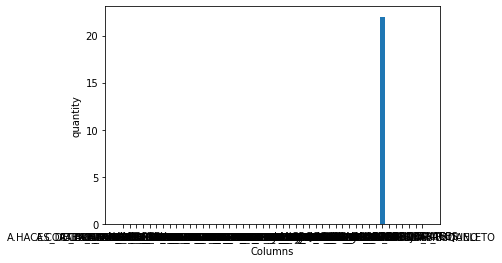

In [4]:
import matplotlib.pyplot as plt

plt.bar(missing_df["column"], missing_df["quantity"])
plt.ylabel('quantity')
plt.xlabel('Columns')
plt.show()

# Ejercicio 2

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Echocardiogram">ecocardiogramas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [5]:
import pandas as pd
import numpy as np
import requests
import io

with requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"
) as url:
    df = pd.read_csv(io.StringIO(url.content.decode("utf-8")),
                     sep="\n", header=None)
    df = df[0].str.split(",", expand=True)

df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0,None
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0,None
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0,None
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0,None
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?,None
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?,None
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?,None
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?,None


In [6]:
missing = []
for column in df.columns:
    item = {}
    item["column"] = column
    item["type"] = df[column].dtypes
    item["percentage"] = np.mean(df[column].isnull())*100
    item["quantity"] = np.sum(df[column].isnull())
    missing.append(item)
missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,0,object,0.000000,0
1,1,object,0.000000,0
2,2,object,0.000000,0
3,3,object,0.000000,0
4,4,object,0.000000,0
5,5,object,0.000000,0
6,6,object,0.000000,0
7,7,object,0.000000,0
8,8,object,0.000000,0
9,9,object,0.000000,0


# Limpieza de datos

Eliminamos la columna 13 porque abarca en su totalidad valores null

In [7]:
df_to_clear = df.copy(deep = False)
clear_df = df_to_clear.drop(13, axis=1)
clear_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [8]:
missing = []
for column in clear_df.columns:
    item = {}
    item["column"] = column
    item["type"] = clear_df[column].dtypes
    item["percentage"] = np.mean(clear_df[column] == '?')*100
    item["quantity"] = np.sum(clear_df[column] == '?')
    missing.append(item)
missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,0,object,0.757576,1
1,1,object,0.757576,1
2,2,object,4.545455,6
3,3,object,0.000000,0
4,4,object,6.060606,8
5,5,object,11.363636,15
6,6,object,8.333333,11
7,7,object,3.030303,4
8,8,object,1.515152,2
9,9,object,2.272727,3


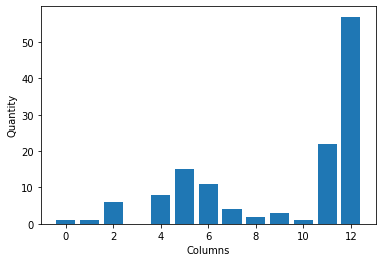

In [9]:
import matplotlib.pyplot as plt

plt.bar(missing_df["column"], missing_df["quantity"])
plt.ylabel('Quantity')
plt.xlabel('Columns')
plt.show()